# Practice Session 03: Find near-duplicates using shingling

Author: <font color="blue">Aniol Petit</font>

E-mail: <font color="blue">aniol.petit01@estudiant.upf.edu</font>

Date: <font color="blue">08/10/2024</font>

In [1]:
import io
import json
import gzip
import re
import random
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

import datetime

In [2]:
# KEEP AS-IS

# Input file
INPUT_FILENAME = "CovidLockdownCatalonia.json.gz"

# Array for storing messages
messages = []

# IMPORTANT:
# 1. Set this to 1000 during development
# 2. Set this to 10000 once you have completed the development, and answer part 5 with 10000
# 3. Set this back to 1000 for delivering your code
MAX_MESSAGES = 1000

with gzip.open(INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
    
    messages_read = 0
    for line in input_file:
            
        # Read message
        tweet = json.loads(line)

        # Keep only messages in Catalan
        if tweet["lang"] == "ca":
            
            messages_read += 1
            
            if messages_read <= MAX_MESSAGES:
                author = tweet["user"]["screen_name"]
                message = tweet["full_text"]
                messages.append(message)

print("Read %d documents" % len(messages))

Read 1000 documents


# 1. Auxiliary functions

<font size="+1" color="red">Replace this cell with your code for function "jaccard_similarity"</font>

In [3]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    if len(union) == 0:
        return 0  # If both sets are empty, we can define similarity as 0
        
    return len(intersection) / len(union)

<font size="+1" color="red">Replace this cell with your code testing "jaccard_similarity"</font>

In [4]:
# Test 1: Jaccard similarity should be 0.5
list1 = "hola"
list2 = "ho"
result = jaccard_similarity(list1, list2)
print(f"Test 1 jaccard similarity: {result}")
if result == .5:
    print("Test 1 passed!")
else:
    print("Test 1 failed!")

# Test 2: Jaccard similarity should be 0.75
list1 = "hola"
list2 = "hol"
result = jaccard_similarity(list1, list2)
print(f"Test 2 jaccard similarity: {result}")
if result == .75:
    print("Test 2 passed!")
else:
    print("Test 2 failed!")


# Test 3: Jaccard similarity should be 1.0 for two empty lists
list1 = ""
list2 = ""
result = jaccard_similarity(list1, list2)
print(f"Test 3 jaccard similarity: {result}")
if result == 0:
    print("Test 3 passed!")
else:
    print("Test 3 failed!")


# Test 4: Jaccard similarity should be 1.0 for identical lists
list1 = "hola"
list2 = "hola"
result = jaccard_similarity(list1, list2)
print(f"Test 4 jaccard similarity: {result}")
if result == 1:
    print("Test 4 passed!")
else:
    print("Test 4 failed!")




Test 1 jaccard similarity: 0.5
Test 1 passed!
Test 2 jaccard similarity: 0.75
Test 2 passed!
Test 3 jaccard similarity: 0
Test 3 passed!
Test 4 jaccard similarity: 1.0
Test 4 passed!


<font size="+1" color="red">Replace this cell with your code for function "clean"</font>

In [5]:
def clean(text):
    
    #STEP 1
    text = re.sub(r'^RT ', '', text)

    #STEP 2
    text = text.lower()

    #STEP 3
    replacements = {'ñ': 'n', 'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u','à': 'a', 'è': 'e', 'ò': 'o', 'l·l': 'll', 'ç': 'c'}
    
    for key, value in replacements.items():
        text = text.replace(key, value)

    #STEP 4
    text = re.sub(r'http\S+|https\S+', '', text)

    #STEP 5
    text = text.strip()

    #STEP 6
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    #STEP 7
    text = re.sub(r'\s+', ' ', text)

    return text

<font size="+1" color="red">Replace this cell with your code testing function "clean"</font>

In [6]:
test_cases = [
    "RT Chéck this out https://example.com!",
    "¡Hola! ¿Cómo estás? Voy a la piñata.",
    "Well... this   is interesting!!",
    " Hola l·l! Ràmón is here. ",
    "RT 1234 Testing URL http://test.com 5678!!"
]

for i, test in enumerate(test_cases, 1):
    cleaned_text = clean(test)
    print(f"Test Case {i}:\nOriginal: {test}\nCleaned: {cleaned_text}\n")

Test Case 1:
Original: RT Chéck this out https://example.com!
Cleaned: check this out

Test Case 2:
Original: ¡Hola! ¿Cómo estás? Voy a la piñata.
Cleaned: hola como estas voy a la pinata

Test Case 3:
Original: Well... this   is interesting!!
Cleaned: well this is interesting

Test Case 4:
Original:  Hola l·l! Ràmón is here. 
Cleaned: hola ll ramon is here

Test Case 5:
Original: RT 1234 Testing URL http://test.com 5678!!
Cleaned: 1234 testing url 5678



# 2. Implement an n-gram extractor

<font size="+1" color="red">Replace this cell with your code implementing function "ngrams(text,size)"</font>

In [7]:
MIN_TOKEN_LENGTH = 3

def ngrams(text, size):
    tokens = clean(text).split()

    filtered_tokens = [] 
    for token in tokens:
        if len(token) >= MIN_TOKEN_LENGTH: 
            filtered_tokens.append(token)   

    ngrams = [] 
    for i in range(len(filtered_tokens) - size + 1):
        ngram = ' '.join(filtered_tokens[i:i + size])
        ngrams.append(ngram)  

    return ngrams


<font size="+1" color="red">Replace this cell with your code testing function "ngrams"</font>

In [8]:
print(messages[990])
print(ngrams(messages[990], 3))

Clam per la suspensió dels desnonaments en plena crisi pel coronavirus https://t.co/0g1AtSELwl
['clam per suspensio', 'per suspensio dels', 'suspensio dels desnonaments', 'dels desnonaments plena', 'desnonaments plena crisi', 'plena crisi pel', 'crisi pel coronavirus']


# 3. Estimation of brute force all-pairs method

In [9]:
# LEAVE AS-IS

def time_brute_force_similarities(messages, limit, ngram_size):
    if limit > len(messages):
        raise ValueError("Limit should be less than or equal than the number of messages")
        
    # Start a timer
    start = timer()

    # Iterate through document identifiers
    for docid1 in range(np.min([len(messages), limit])):

        # Clean document 1 and extract ngrams
        doc1 = clean(messages[docid1])
        ngrams1 = ngrams(doc1, ngram_size)

        # Iterate through document identifiers larger than doc2
        for docid2 in range(docid1+1, np.min([len(messages), limit])):
                         
            # Clean document 2 and extract ngrams
            doc2 = clean(messages[docid2])
            ngrams2 = ngrams(doc2, ngram_size)

            # Compute similarity
            similarity = jaccard_similarity(ngrams1, ngrams2)

    end = timer()
    return(end - start)

<font size="+1" color="red">Replace this cell with your code for generating the requested plot. Remember to add a title and label for the x and y axis.</font>

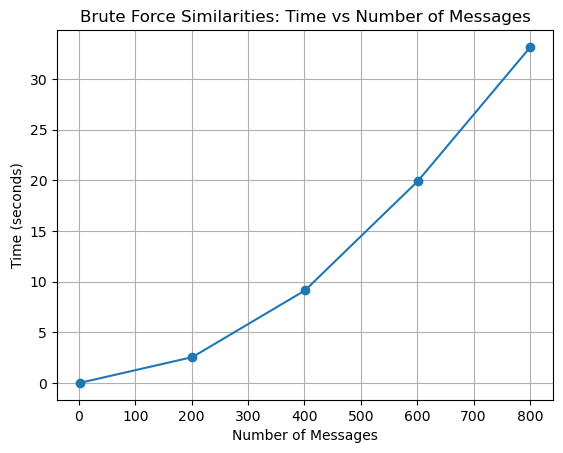

In [10]:
def plot_similarity_timing(messages):
    x_vals = range(1, 1001, 200)  # Number of messages from 1 to 1001, in steps of 200
    y_vals = []

    for limit in x_vals:
        time_taken = time_brute_force_similarities(messages, limit, ngram_size=5)
        y_vals.append(time_taken)

    # Plotting
    plt.plot(x_vals, y_vals, marker='o', linestyle='-')
    plt.title("Brute Force Similarities: Time vs Number of Messages")
    plt.xlabel("Number of Messages")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()

plot_similarity_timing(messages)

<font size="+1" color="red">Replace this cell with (1) a brief commmentary about what you see in this plot, and (2) your estimate for how long it would take to run the brute force similarity computations for the entire input matrix. Express your estimation in hours, minutes, and seconds. Justify precisely your calculations.</font>

(1) We see that the plot follows sort of a quadratic shape, meaning that for short amounts of messages to check the amount of time required is very small, but as the number of messages increases the time in seconds also increases faster every time (more or less quadratically).

(2)We know that the entire input matrix has 35,500 rows (messages). To compute the estimate time it would take for the brute force computations for the whole matrix, we will use the fact that, as we can see in the graph, for 500 messages we need approximately 5 seconds. We will also use the fact that the computation seems to have O(n^2) complexity, since the graph has sort of a quadratic form as we stated previously. Hence, we can find in the first place how much longer does it take to compute 35500 messages than 500 messages by doing a simple proportion and squaring it (since the graphic grows quadratically): scale = (35500/500)^2 = 5041. 
Then to compute the time fot the whole matrix, we just need to multiply the time it took to process 500 messages (5 seconds) by the number of times that it will take longer to process al 35500 messages.
Total time = 5 seconds x 5041 = 25205 seconds, or 7 hours 0 minutes and 5 seconds

# 4. Computing the doc-ngram matrix

## 4.1 Create list of all ngrams

<font size="+1" color="red">Replace this cell with your code for creating the ngram_to_index dictionary.</font>

In [11]:
NGRAM_SIZE = 4
ngram_to_index = {}
index_to_ngram = {}
next_index = 0

for message in messages:
    all_ngrams = ngrams(message, NGRAM_SIZE)
    for ngram in all_ngrams:
        if ngram not in ngram_to_index:
            ngram_to_index[ngram] = next_index
            index_to_ngram[next_index] = ngram
            next_index += 1

num_distinct_ngrams = next_index

print("There are %d distinct ngrams in the %d documents" % (num_distinct_ngrams, len(messages)))

print("\nSample of ngram_to_index dictionary (first 10 items):")
for i, (ngram, index) in enumerate(ngram_to_index.items()):
    if i >= 10:
        break
    print(f"Ngram: '{ngram}' -> Index: {index}")

print("\nSample of index_to_ngram dictionary (first 10 items):")
for i in range(min(10, len(index_to_ngram))):
    print(f"Index: {i} -> Ngram: '{index_to_ngram[i]}'")

There are 8070 distinct ngrams in the 1000 documents

Sample of ngram_to_index dictionary (first 10 items):
Ngram: 'aramateix gestio del telefon' -> Index: 0
Ngram: 'gestio del telefon datencio' -> Index: 1
Ngram: 'del telefon datencio 061' -> Index: 2
Ngram: 'telefon datencio 061 depen' -> Index: 3
Ngram: 'datencio 061 depen ferrovial' -> Index: 4
Ngram: '061 depen ferrovial decisio' -> Index: 5
Ngram: 'depen ferrovial decisio del' -> Index: 6
Ngram: 'ferrovial decisio del govern' -> Index: 7
Ngram: 'decisio del govern modifica' -> Index: 8
Ngram: 'del govern modifica aixo' -> Index: 9

Sample of index_to_ngram dictionary (first 10 items):
Index: 0 -> Ngram: 'aramateix gestio del telefon'
Index: 1 -> Ngram: 'gestio del telefon datencio'
Index: 2 -> Ngram: 'del telefon datencio 061'
Index: 3 -> Ngram: 'telefon datencio 061 depen'
Index: 4 -> Ngram: 'datencio 061 depen ferrovial'
Index: 5 -> Ngram: '061 depen ferrovial decisio'
Index: 6 -> Ngram: 'depen ferrovial decisio del'
Index: 7 -

<font size="+1" color="red">Replace this cell with your code for testing the ngram_to_index structure.</font>

In [12]:
idx1 = ngram_to_index["els restaurants han reduir"]
print(f"Index for string -els restaurants han de reduir-: {idx1}")
idx2 = ngram_to_index["supera fins tot mateix"]
print(f"Index for string -supera fins tot mateix-: {idx2}")
print(f"String for index {idx1}: {index_to_ngram[idx1]}")
print(f"String for index {idx2}: {index_to_ngram[idx2]}")

Index for string -els restaurants han de reduir-: 14
Index for string -supera fins tot mateix-: 36
String for index 14: els restaurants han reduir
String for index 36: supera fins tot mateix


## 2.2 Create table ngrams x documents

In [13]:
# LEAVE AS-IS

# Create dense matrix in which every cell contains the value "False"
M_ngram_doc = np.full((num_distinct_ngrams, len(messages)), False)

# Print the number of rows and columns of this matrix
# numpy.matrix.shape is a tuple, shape[0] is the number of rows, shape[1] the number of columns
print("Matrix dimensions: %d rows (distinct shingles) x %d columns (distinct documents)" % M_ngram_doc.shape)

Matrix dimensions: 8070 rows (distinct shingles) x 1000 columns (distinct documents)


<font size="+1" color="red">Replace this cell with your code for filling the M_ngram_doc matrix.</font>

In [14]:
for docid in range(len(messages)):
    message = messages[docid]
    all_ngrams = ngrams(message, NGRAM_SIZE)
    
    for ngram in all_ngrams:
        if ngram in ngram_to_index:
            ngram_index = ngram_to_index[ngram]
            M_ngram_doc[ngram_index, docid] = True



<font size="+1" color="red">Replace this cell with your code for printing the density of the M_ngram_doc matrix as a percentage. Use 4 decimals.</font>

In [15]:
total_cells = M_ngram_doc.shape[0] * M_ngram_doc.shape[1]
non_zero_cells = np.count_nonzero(M_ngram_doc)
density_percentage = (non_zero_cells / total_cells) * 100

# Print the density percentage with 4 decimals
print(f"Density of the matrix: {density_percentage:.4f}%")

Density of the matrix: 0.1395%


<font size="+1" color="red">Replace this cell with your code for printing rows 9602 and 941 of the M_ngram_doc matrix. (I'll do docid 16 instead of 9602 since there are not that many documents)</font>

In [16]:
def print_non_zeros(docid):
    if docid >= len(messages):
        print(f"Document {docid} is out of bounds!")
        return
    
    clean_message = clean(messages[docid])
    
    non_zero_rows = np.where(M_ngram_doc[:, docid])[0]
    
    print(f"\nPositions of non-zeros in column of docid {docid} of M_ngram_doc\n")
    print(f"Clean message:\n {clean_message}\n")
    
    non_zeros = [f"{row} ({index_to_ngram[row]})" for row in non_zero_rows]
    
    print(f"Non-zeros in corresponding row:\n {non_zeros}")


print_non_zeros(16)
print_non_zeros(941)


Positions of non-zeros in column of docid 16 of M_ngram_doc

Clean message:
 emergenciescat es demana a la ciutadania limitar al maxim i si es pot evitar desplacaments de cap de setmana tot el que sigui ma

Non-zeros in corresponding row:
 ['178 (emergenciescat demana ciutadania limitar)', '179 (demana ciutadania limitar maxim)', '180 (ciutadania limitar maxim pot)', '181 (limitar maxim pot evitar)', '182 (maxim pot evitar desplacaments)', '183 (pot evitar desplacaments cap)', '184 (evitar desplacaments cap setmana)', '185 (desplacaments cap setmana tot)', '186 (cap setmana tot que)', '187 (setmana tot que sigui)']

Positions of non-zeros in column of docid 941 of M_ngram_doc

Clean message:
 hospiolot usem de forma responsable els recursos sanitaris 061 urgencies per coronavirus i sanitaries 012 consultes general

Non-zeros in corresponding row:
 ['1065 (usem forma responsable els)', '1066 (forma responsable els recursos)', '1067 (responsable els recursos sanitaris)', '1068 (els recu

# 3. Implement a permutation generator

<font size="+1" color="red">Replace this cell with your code for "random_permutation"</font>

In [17]:
def random_permutation(k):
    arr = list(range(k))  
    random.shuffle(arr)    
    return arr

permutation = random_permutation(20)
print(permutation)

[19, 15, 18, 9, 4, 1, 5, 6, 10, 13, 7, 14, 17, 12, 16, 8, 2, 11, 0, 3]


In [18]:
# LEAVE AS-IS

# Permute a list according to a permutation
def permuter(original_list, permutation):
    permuted_list = []
    for index in permutation:
        permuted_list.append(original_list[index])
    return permuted_list

# Code for testing permutations
original_list_1 = ["1 (test1)", "2 (test2)", "3 (test3)", "4 (test4)", "5 (test5)"]
original_list_2 = ["1 (alpha)", "2 (gamma)", "3 (beta)", "4 (delta)", "5 (epsilon)"]

print("Test one permutation:")
permutation_1 = random_permutation(5)
print(permuter(original_list_1, permutation_1))
print(permuter(original_list_2, permutation_1))

print()

print("Test another permutation")
permutation_2 = random_permutation(5)
print(permuter(original_list_1, permutation_2))
print(permuter(original_list_2, permutation_2))

Test one permutation:
['1 (test1)', '4 (test4)', '3 (test3)', '5 (test5)', '2 (test2)']
['1 (alpha)', '4 (delta)', '3 (beta)', '5 (epsilon)', '2 (gamma)']

Test another permutation
['4 (test4)', '1 (test1)', '5 (test5)', '2 (test2)', '3 (test3)']
['4 (delta)', '1 (alpha)', '5 (epsilon)', '2 (gamma)', '3 (beta)']


# 4. Compute the signature of each document

In [19]:
# Leave this code as-is

NUM_PERMUTATIONS = 5

permutations = []

# Create the permutations
for i in range(NUM_PERMUTATIONS):
    permutation = random_permutation(num_distinct_ngrams)
    permutations.append(random_permutation(num_distinct_ngrams))
    
# Visualize the permutations by printing their first 4 elements
for i in range(len(permutations)):
    permutation = permutations[i]
    print("Permutation %d: %d, %d, %d, %d, ..." % (i,
                permutation[0], permutation[1], permutation[2], permutation[3] ))

Permutation 0: 1616, 1235, 210, 4367, ...
Permutation 1: 507, 6840, 2049, 120, ...
Permutation 2: 156, 4315, 7167, 4647, ...
Permutation 3: 6050, 389, 4047, 4770, ...
Permutation 4: 5931, 3243, 7986, 5486, ...


In [20]:
# LEAVE AS-IS

# Find the first ngram in a document, according to a permutation
def find_first_one(docid, permutation):
    for shingle_id in permutation:
        if M_ngram_doc[shingle_id, docid] == True:
            return shingle_id
    return -1

<font size="+1" color="red">Replace this cell with your code for creating M_signature_doc</font>

In [21]:
M_signature_doc = np.full((NUM_PERMUTATIONS, len(messages)), np.nan)

for permutation_num in range(NUM_PERMUTATIONS):
    print("Creating signatures for permutation %d/%d" % (permutation_num + 1, NUM_PERMUTATIONS))
    permutation = permutations[permutation_num]
    
    for docid in range(len(messages)):
        if docid % 1000 == 0:
            print("- Scanning document %d of %d" % (docid, len(messages)))
        
        first_ngram_id = find_first_one(docid, permutation)
        
        M_signature_doc[permutation_num, docid] = first_ngram_id

Creating signatures for permutation 1/5
- Scanning document 0 of 1000
Creating signatures for permutation 2/5
- Scanning document 0 of 1000
Creating signatures for permutation 3/5
- Scanning document 0 of 1000
Creating signatures for permutation 4/5
- Scanning document 0 of 1000
Creating signatures for permutation 5/5
- Scanning document 0 of 1000


In [22]:
# Leave this code as-is

def extract_ngrams(docid):
    return [x for x in range(num_distinct_ngrams) if M_ngram_doc[x, docid] == True]

def extract_signature(docid):
    return [M_signature_doc[x, docid] for x in range(NUM_PERMUTATIONS)]

def print_sig(messages, M_ngram_doc, M_signature_doc, i):
    print("Document #%d" % i)
    print("Message       : %s" % messages[i])
    print("Clean message : %s" % clean(messages[i]))
    print("Ngrams        : %s" % extract_ngrams(i))
    print("Signature     : %s" % extract_signature(i))

# Print two messages and their signatures

print_sig(messages, M_ngram_doc, M_signature_doc, 21 )
print()
print_sig(messages, M_ngram_doc, M_signature_doc, 24 )

Document #21
Message       : El problema és económic... ja no és només que primi lo económic a lo personal, és que fins i tot en això el @govern s'equivoca, doncs al final la factura que s'haurà de pagar serà més gran.... ja és més gran del que hauria sigut de fer les coses bé i a temps. https://t.co/jFXHAMZHO0
Clean message : el problema es economic ja no es nomes que primi lo economic a lo personal es que fins i tot en aixo el govern sequivoca doncs al final la factura que shaura de pagar sera mes gran ja es mes gran del que hauria sigut de fer les coses be i a temps
Ngrams        : [231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259]
Signature     : [239.0, 257.0, 239.0, 258.0, 250.0]

Document #24
Message       : RT @QuimTorraiPla: Seguiu les recomanacions: eviteu qualsevol desplaçament al màxim
Clean message : quimtorraipla seguiu les recomanacions eviteu qualsevol desplacament al maxim
Ng

# 5. Compare all pairs of signatures

<font size="+1" color="red">Replace this cell with your code for comparing all signatures; print all documents that have at least X signature matches, considering both full matches and partial matches. X should be 0.5% of the  number of documents.</font>

In [23]:
is_possible_duplicate = {}

threshold = 0.005 * len(messages)

for docid1 in range(len(messages)):
    if docid1 not in is_possible_duplicate:
        count_sig_full_matches = 0
        count_sig_partial_matches = 0

        signature1 = extract_signature(docid1)
        if docid1 % 500 == 0:
            print("%d/%d documents scanned" % (docid1, len(messages)))

        for docid2 in range(docid1 + 1, len(messages)):
            if docid2 not in is_possible_duplicate:
                signature2 = extract_signature(docid2)

                similarity = jaccard_similarity(signature1, signature2)

                if similarity == 1.0:
                    count_sig_full_matches += 1
                    is_possible_duplicate[docid2] = True  
                elif 0.2 < similarity < 1.0:
                    count_sig_partial_matches += 1
                    is_possible_duplicate[docid2] = True  
                    print(f"Partial Match: {docid1} and {docid2}")  #Print the partial match so to find the similar messages

        if (count_sig_full_matches + count_sig_partial_matches >= threshold) or (count_sig_partial_matches>=15): #print some with many partial matches, otherwise there are no cases of documents with many partial matches that are above threshold
            print(f"Document {docid1} has {count_sig_full_matches} full matches and {count_sig_partial_matches} partial matches.")
            

0/1000 documents scanned
Document 2 has 5 full matches and 0 partial matches.
Partial Match: 9 and 776
Partial Match: 10 and 799
Partial Match: 13 and 133
Partial Match: 13 and 555
Partial Match: 14 and 380
Document 16 has 6 full matches and 0 partial matches.
Partial Match: 19 and 20
Partial Match: 19 and 72
Partial Match: 19 and 89
Partial Match: 19 and 141
Partial Match: 19 and 156
Partial Match: 19 and 226
Partial Match: 19 and 394
Partial Match: 19 and 584
Partial Match: 19 and 629
Partial Match: 19 and 742
Partial Match: 19 and 782
Partial Match: 19 and 981
Partial Match: 19 and 989
Document 19 has 0 full matches and 13 partial matches.
Document 22 has 7 full matches and 0 partial matches.
Partial Match: 32 and 98
Partial Match: 32 and 213
Partial Match: 32 and 697
Partial Match: 32 and 734
Partial Match: 32 and 785
Partial Match: 32 and 797
Document 32 has 5 full matches and 6 partial matches.
Document 42 has 8 full matches and 0 partial matches.
Document 53 has 5 full matches a

<font size="+1" color="red">Replace this cell with a brief commentary, based on the results above, about one tweet that has a substantial number of complete matches, but few partial matches. Include the full text of the original tweet. Comment on why you believe this tweet is not being changed much when copied or re-tweeted.</font>

I take document 5077, with 176 full matches and 0 partial matches. Its clean message is: emergenciescat que puc fer i que no faqs del coronavirus a 14 de marc si us plau demanem difusio.
Looking at the content of the tweet it is normal that people do not change it much when reposting it, since it is an urgent message directed to the emergency service of Catalunya asking for instructions on what to do about coronavirus in its peak moment, hence it was a time where people were confused and needed to be very direct and concise when asking for information. Furthermore, the original tweet asks for difusion, which leads to readers to just re-tweet it straight forward without further changes, since the original author already said everything that's important and just needs its message to reach the most people possible, not its message being modified.

<font size="+1" color="red">Replace this cell with a brief commentary, based on the results above, about one tweet that has a substantial number of partial matches, but fewer complete matches. Include the full text of the original tweet and one near duplicate (that cannot be identical to the original tweet).</font>

In [25]:
clean(messages[89])

'diariara dinamarca tanca les seves fronteres per evitar la propagacio del coronavirus'

In [26]:
clean(messages[226])

'salutcat ultimes mesures de prevencio per evitar la propagacio del coronavirus sarscov2 '

I take document 89, with 0 full matches and 16 partial matches. Its clean message is: diariara dinamarca tanca les seves fronteres per evitar la propagacio del coronavirus. 
In this case it makes sense that the message has many partial matches but no total matches since it is an informative message, unlike the first one which was rather a message to raise concern and asking for help. It is known that informative messages when propagated are a bit changed, people that want to report the new they've read they tell it their own way, not with the exact same words than the original author, but with their own words, which can be a cause for which it has partial matches.
Another reason for that can be the fact that is talking about coronavirus propagation, and many messages may tell similar things but in a different context, as message 89 is talking about Denmark closing its borders to avoid covid propagation, but we can see another message that accounts as a partial match to message 89 (message 226:salutcat ultimes mesures de prevencio per evitar la propagacio del coronavirus sarscov2), which is talking about coronavirus propagation but makes no reference to Denmark, hence this is clearly another reason why this message has partial matches, because it is about a subject that's very broad and can be included in many different context. 

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>